In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Setting up the dataframe


In [2]:
df = pd.read_csv("Crop_recommendation.csv")
# dropping out 'label' column
data_without_label = df.drop(['label'], axis=1)

### Since 'label' column in the dataframe contains string values, we are converting the string values to numeric values

For example, we are assigning
cotton -> 4, so if we get 4 in the prediction, that means the predicted output is jute

In [3]:
# converting 'label' values to numeric
df1 = df.copy()
def convertLabeltoNumeric(df1):
 for i in df1:
  data = df[i].map({
      'rice':1,
      'maize':2,
      'jute':3,
      'cotton':4,
      'papaya':	5,
      'orange':	6,
      'apple':	7,
      'muskmelon':	8,
      'watermelon':	9,
      'grapes':	10,
      'mango'	:11,
      'banana':12,
      'pomegranate':13,
      'lentil':14,
      'blackgram':15,
      'mungbean':16,
      'mothbeans':17,
      'pigeonpeas':18,
      'kidneybeans':19,
      'chickpea':20,
      'coffee':21
      })

 return data

# joining data_without_label dd with numeric label df
fData = data_without_label.join(convertLabeltoNumeric(df))
fData.dropna(inplace=True)

# Train data and test data

In [4]:
from sklearn.model_selection import train_test_split

X = fData.drop(['label'], axis=1)
y = fData['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
train_data = X_train.join(y_train)

<Axes: >

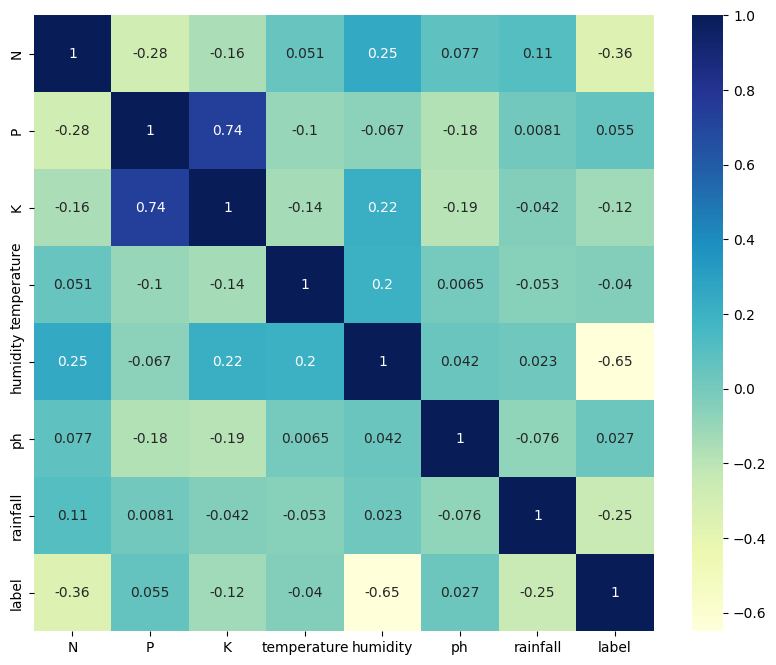

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

# Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()

X_test
y_test

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.4949986818028499

# Random Forest

In [7]:
import sklearn.ensemble as RandomForestRegressor

forest = RandomForestRegressor.RandomForestRegressor()
forest.fit(X_train, y_train)
forest.score(X_test, y_test)
# Random forest regressor giving us the best score

0.9920482275161744

In [8]:
new_data = np.array([[66,69,47, 23.69212243, 93.61055571, 6.912299695, 87.53393983]])  # Feed this information from JAVA rest API
prediction = forest.predict(new_data)
prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([5.85])~ papaya